<a href="https://colab.research.google.com/github/AlexNikooff/final_project/blob/main/%D0%A4%D0%B8%D0%BD%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D0%B9_%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82_%D0%90_%D0%92_%D0%A1%D0%BE%D0%BB%D1%8F%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

## ШАГ 1: ЗАГРУЗКА И ПЕРВИЧНЫЙ АНАЛИЗ ДАННЫХ

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Зерокодер/data_raw_game_rv.csv')

df['dt'] = pd.to_datetime(df['dt'])

print("Структура данных:")
print(f"Всего записей: {df.shape[0]}")
print(f"Уникальных игроков: {df['player_id'].nunique()}")
print(f"Период: {df['dt'].min()} - {df['dt'].max()}")

Структура данных:
Всего записей: 1339
Уникальных игроков: 160
Период: 2025-04-01 00:01:05 - 2025-04-07 23:49:46


# ШАГ 2: ПОДГОТОВКА ДАННЫХ ПО ГРУППАМ

In [ ]:
group_a = df[df['ab_group'] == 'A_control']
group_b = df[df['ab_group'] == 'B_test']

total_players_a = group_a['player_id'].nunique()
total_players_b = group_b['player_id'].nunique()

print(f"\nРаспределение игроков:")
print(f"Группа A (контроль): {total_players_a}")
print(f"Группа B (тест): {total_players_b}")


Распределение игроков:
Группа A (контроль): 85
Группа B (тест): 75


Распределение игроков:
Группа A (контроль): 85
Группа B (тест): 75


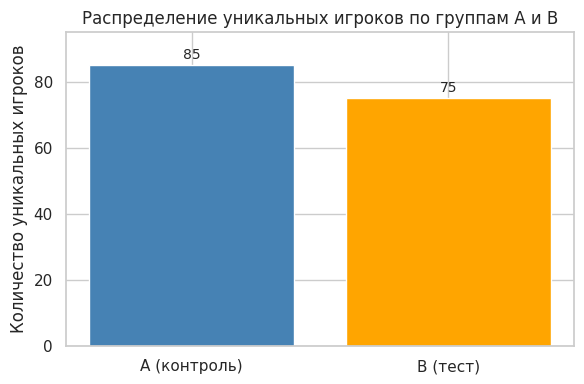

In [ ]:
# Визуализация

import pandas as pd
import matplotlib.pyplot as plt

# 1. Загрузка данных
df = pd.read_csv('/content/drive/MyDrive/Зерокодер/data_raw_game_rv.csv')  # файл из эксперимента

# 2. Подсчет количества уникальных игроков в группах A и B
group_a = df[df['ab_group'] == 'A_control']
group_b = df[df['ab_group'] == 'B_test']

total_players_a = group_a['player_id'].nunique()
total_players_b = group_b['player_id'].nunique()

print("Распределение игроков:")
print(f"Группа A (контроль): {total_players_a}")
print(f"Группа B (тест): {total_players_b}")

# 3. Подготовка данных для графика
groups = ['A (контроль)', 'B (тест)']
players = [total_players_a, total_players_b]

# 4. Построение бар-чарта
plt.figure(figsize=(6, 4))
bars = plt.bar(groups, players, color=['steelblue', 'orange'])

# Подписи значений над столбцами
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.title('Распределение уникальных игроков по группам A и B')
plt.ylabel('Количество уникальных игроков')
plt.ylim(0, max(players) + 10)  # небольшой отступ сверху
plt.tight_layout()

# 5. Сохранение графика для отчета
plt.savefig('players_distribution.png', dpi=300)
plt.show()


# ШАГ 3: РАСЧЕТ КЛЮЧЕВЫХ МЕТРИК

In [ ]:
# 3.1. CR_view = (количество начатых просмотров / количество показов) * 100%  - Показывает, какой процент игроков нажимает на кнопку и начинает просмотр

rv_offers_a = group_a[group_a['event_type'] == 'rv_offer_shown'].shape[0]
rv_starts_a = group_a[group_a['event_type'] == 'rv_start'].shape[0]
cr_view_a = (rv_starts_a / rv_offers_a * 100) if rv_offers_a > 0 else 0

rv_offers_b = group_b[group_b['event_type'] == 'rv_offer_shown'].shape[0]
rv_starts_b = group_b[group_b['event_type'] == 'rv_start'].shape[0]
cr_view_b = (rv_starts_b / rv_offers_b * 100) if rv_offers_b > 0 else 0

print(f"\n1. CR_VIEW (конверсия показ → просмотр):")
print(f"   Группа A: {rv_starts_a}/{rv_offers_a} = {cr_view_a:.2f}%")
print(f"   Группа B: {rv_starts_b}/{rv_offers_b} = {cr_view_b:.2f}%")
print(f"   Прирост: {((cr_view_b - cr_view_a) / cr_view_a * 100):.2f}%")



1. CR_VIEW (конверсия показ → просмотр):
   Группа A: 38/137 = 27.74%
   Группа B: 70/196 = 35.71%
   Прирост: 28.76%


event_type   group_label  rv_offer_shown  rv_start   CR_view
0           A (контроль)             137        38  0.277372
1               B (тест)             196        70  0.357143


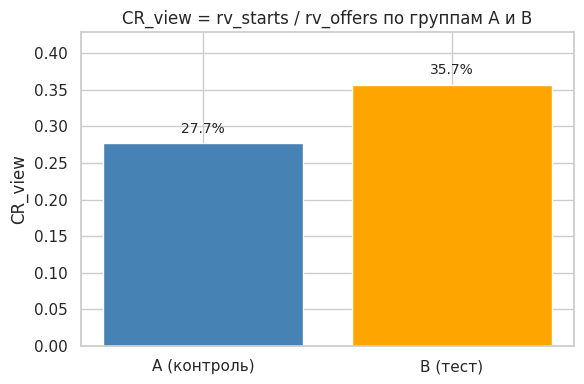

In [ ]:
# Визуализация

import pandas as pd
import matplotlib.pyplot as plt

# 1. Загрузка сырых событий
df = pd.read_csv('/content/drive/MyDrive/Зерокодер/data_raw_game_rv.csv')

# 2. Подсчёт rv_offers и rv_starts по группам
agg = (
    df
    .groupby('ab_group')['event_type']
    .value_counts()
    .unstack(fill_value=0)
    .reset_index()
)

# Убедимся, что колонки существуют (rv_offer_shown и rv_start)
# Если каких-то событий нет, заполнить нулями
for col in ['rv_offer_shown', 'rv_start']:
    if col not in agg.columns:
        agg[col] = 0

# 3. Расчёт CR_view = rv_starts / rv_offers
agg['CR_view'] = agg['rv_start'] / agg['rv_offer_shown']

# Переименуем группы в более читаемый вид
group_map = {'A_control': 'A (контроль)', 'B_test': 'B (тест)'}
agg['group_label'] = agg['ab_group'].map(group_map)

print(agg[['group_label', 'rv_offer_shown', 'rv_start', 'CR_view']])

# 4. Визуализация CR_view по группам (bar chart)
plt.figure(figsize=(6, 4))

bars = plt.bar(
    agg['group_label'],
    agg['CR_view'],
    color=['steelblue', 'orange']
)

# Подписи значений над столбцами (в процентах)
for bar, val in zip(bars, agg['CR_view']):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.01,
        f'{val*100:.1f}%',   # выводим как проценты
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.title('CR_view = rv_starts / rv_offers по группам A и B')
plt.ylabel('CR_view')
plt.ylim(0, max(agg['CR_view']) * 1.2)
plt.tight_layout()

# 5. Сохранение для отчёта (опционально)
plt.savefig('cr_view_by_group.png', dpi=300)
plt.show()


In [ ]:
# 3.2 CR_COMPLETE - конверсия из начала в завершение просмотра
# CR_complete = (количество завершенных / количество начатых) * 100% - Показывает, какой процент игроков досматривает рекламу до конца

rv_completes_a = group_a[group_a['event_type'] == 'rv_complete'].shape[0]
cr_complete_a = (rv_completes_a / rv_starts_a * 100) if rv_starts_a > 0 else 0

rv_completes_b = group_b[group_b['event_type'] == 'rv_complete'].shape[0]
cr_complete_b = (rv_completes_b / rv_starts_b * 100) if rv_starts_b > 0 else 0

print(f"\n2. CR_COMPLETE (конверсия начало → завершение):")
print(f"   Группа A: {rv_completes_a}/{rv_starts_a} = {cr_complete_a:.2f}%")
print(f"   Группа B: {rv_completes_b}/{rv_starts_b} = {cr_complete_b:.2f}%")
print(f"   Прирост: {((cr_complete_b - cr_complete_a) / cr_complete_a * 100):.2f}%")



2. CR_COMPLETE (конверсия начало → завершение):
   Группа A: 30/38 = 78.95%
   Группа B: 67/70 = 95.71%
   Прирост: 21.24%


event_type   group_label  rv_start  rv_complete  CR_complete
0           A (контроль)        38           30    78.947368
1               B (тест)        70           67    95.714286


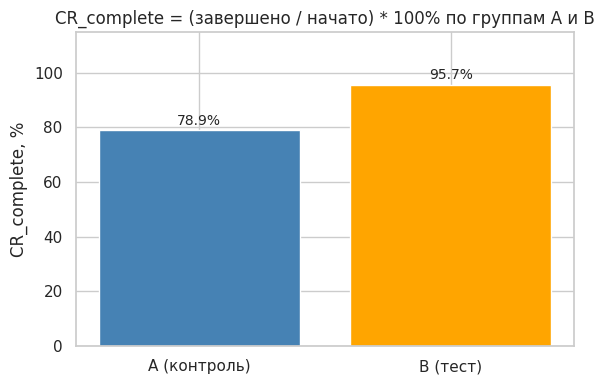

In [ ]:
# Визуализация

import pandas as pd
import matplotlib.pyplot as plt

# 1. Загрузка сырых событий
df = pd.read_csv('/content/drive/MyDrive/Зерокодер/data_raw_game_rv.csv')

# 2. Подсчет started / completed по группам
# event_type: rv_start — начало просмотра, rv_complete — завершение
agg = (
    df
    .groupby('ab_group')['event_type']
    .value_counts()
    .unstack(fill_value=0)
    .reset_index()
)

# Гарантируем наличие нужных колонок
for col in ['rv_start', 'rv_complete']:
    if col not in agg.columns:
        agg[col] = 0

# 3. Расчет CR_complete = (completes / starts) * 100
agg['CR_complete'] = agg['rv_complete'] / agg['rv_start'] * 100

# Переименование групп для подписи на графике
group_map = {'A_control': 'A (контроль)', 'B_test': 'B (тест)'}
agg['group_label'] = agg['ab_group'].map(group_map)

print(agg[['group_label', 'rv_start', 'rv_complete', 'CR_complete']])

# 4. Визуализация CR_complete по группам (bar chart)
plt.figure(figsize=(6, 4))

bars = plt.bar(
    agg['group_label'],
    agg['CR_complete'],
    color=['steelblue', 'orange']
)

# Подписи значений над столбцами (в процентах)
for bar, val in zip(bars, agg['CR_complete']):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,
        f'{val:.1f}%',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.title('CR_complete = (завершено / начато) * 100% по группам A и B')
plt.ylabel('CR_complete, %')
plt.ylim(0, max(agg['CR_complete']) * 1.2)
plt.tight_layout()

# 5. Сохранение графика для отчета (опционально)
plt.savefig('cr_complete_by_group.png', dpi=300)
plt.show()


In [ ]:
# 3.3 REWARD USAGE RATE - процент использования полученной награды
# Reward_Usage = (использовано наград / завершено просмотров) * 100% - Показывает, как часто игроки используют полученную награду

rewards_used_a = group_a[group_a['event_type'] == 'reward_used'].shape[0]
reward_usage_a = (rewards_used_a / rv_completes_a * 100) if rv_completes_a > 0 else 0

rewards_used_b = group_b[group_b['event_type'] == 'reward_used'].shape[0]
reward_usage_b = (rewards_used_b / rv_completes_b * 100) if rv_completes_b > 0 else 0

print(f"\n3. REWARD USAGE RATE:")
print(f"   Группа A: {rewards_used_a}/{rv_completes_a} = {reward_usage_a:.2f}%")
print(f"   Группа B: {rewards_used_b}/{rv_completes_b} = {reward_usage_b:.2f}%")
print(f"   Изменение: {((reward_usage_b - reward_usage_a) / reward_usage_a * 100):.2f}%")


3. REWARD USAGE RATE:
   Группа A: 25/30 = 83.33%
   Группа B: 44/67 = 65.67%
   Изменение: -21.19%


event_type   group_label  rv_complete  reward_used  Reward_Usage
0           A (контроль)           30           25     83.333333
1               B (тест)           67           44     65.671642


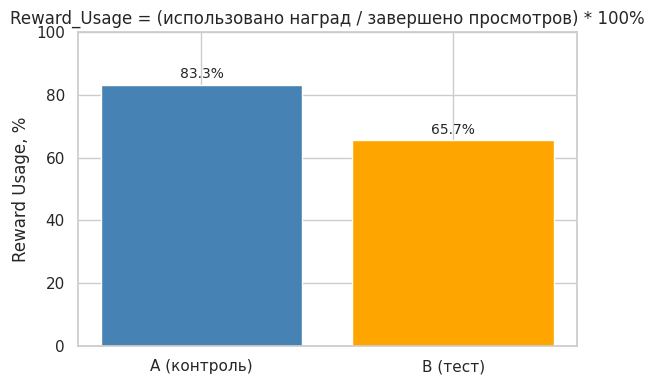

In [ ]:
# Визуализация

import pandas as pd
import matplotlib.pyplot as plt

# 1. Загрузка сырых событий
df = pd.read_csv('/content/drive/MyDrive/Зерокодер/data_raw_game_rv.csv')

# 2. Подсчет завершенных просмотров и использованных наград по группам
# event_type:
#   rv_complete  — завершение просмотра
#   reward_used  — использование награды
agg = (
    df
    .groupby('ab_group')['event_type']
    .value_counts()
    .unstack(fill_value=0)
    .reset_index()
)

# Гарантируем наличие нужных колонок
for col in ['rv_complete', 'reward_used']:
    if col not in agg.columns:
        agg[col] = 0

# 3. Расчет Reward_Usage = (reward_used / rv_complete) * 100
agg['Reward_Usage'] = agg['reward_used'] / agg['rv_complete'] * 100

# Переименование групп для читаемых подписей
group_map = {'A_control': 'A (контроль)', 'B_test': 'B (тест)'}
agg['group_label'] = agg['ab_group'].map(group_map)

print(agg[['group_label', 'rv_complete', 'reward_used', 'Reward_Usage']])

# 4. Визуализация Reward_Usage по группам (bar chart)
plt.figure(figsize=(6, 4))

bars = plt.bar(
    agg['group_label'],
    agg['Reward_Usage'],
    color=['steelblue', 'orange']
)

# Подписи значений над столбцами (в процентах)
for bar, val in zip(bars, agg['Reward_Usage']):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,
        f'{val:.1f}%',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.title('Reward_Usage = (использовано наград / завершено просмотров) * 100%')
plt.ylabel('Reward Usage, %')
plt.ylim(0, max(agg['Reward_Usage']) * 1.2)
plt.tight_layout()

# 5. Сохранение графика для отчета (опционально)
plt.savefig('reward_usage_by_group.png', dpi=300)
plt.show()


In [ ]:
# 3.4 ARPU - средний доход на одного пользователя
# ARPU = общая выручка / количество пользователей - Ключевая бизнес-метрика, показывающая монетизацию

revenue_a = group_a[group_a['event_type'] == 'revenue']['value'].sum()
arpu_a = revenue_a / total_players_a

revenue_b = group_b[group_b['event_type'] == 'revenue']['value'].sum()
arpu_b = revenue_b / total_players_b

print(f"\n4. ARPU (средний доход на пользователя):")
print(f"   Группа A: ${arpu_a:.4f} (выручка ${revenue_a:.2f})")
print(f"   Группа B: ${arpu_b:.4f} (выручка ${revenue_b:.2f})")
print(f"   Прирост: {((arpu_b - arpu_a) / arpu_a * 100):.2f}%")


4. ARPU (средний доход на пользователя):
   Группа A: $0.0104 (выручка $0.89)
   Группа B: $0.0282 (выручка $2.12)
   Прирост: 170.45%


    group_label  revenue  players      ARPU
0  A (контроль)   0.8875       85  0.010441
1      B (тест)   2.1179       75  0.028239


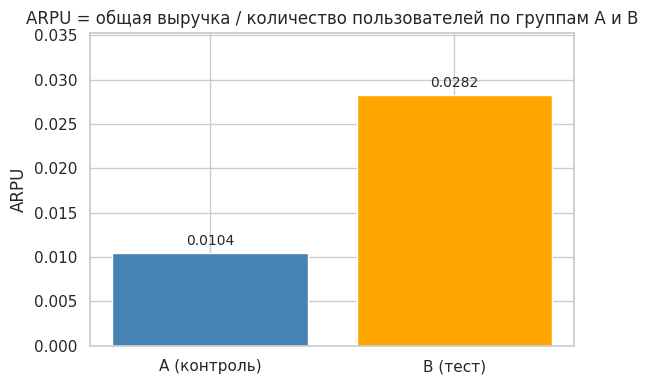

In [ ]:
# Визуализация

import pandas as pd
import matplotlib.pyplot as plt

# 1. Загрузка событий
df = pd.read_csv('/content/drive/MyDrive/Зерокодер/data_raw_game_rv.csv')
# Оставляем только события с выручкой
rev = df[df['event_type'] == 'revenue']

# 2. Считаем общую выручку и количество уникальных игроков по группам
revenue_by_group = rev.groupby('ab_group')['value'].sum().reset_index(name='revenue')
players_by_group = df.groupby('ab_group')['player_id'].nunique().reset_index(name='players')

agg = pd.merge(revenue_by_group, players_by_group, on='ab_group', how='inner')

# 3. ARPU = общая выручка / количество пользователей
agg['ARPU'] = agg['revenue'] / agg['players']

# Для читаемых подписей групп
group_map = {'A_control': 'A (контроль)', 'B_test': 'B (тест)'}
agg['group_label'] = agg['ab_group'].map(group_map)

print(agg[['group_label', 'revenue', 'players', 'ARPU']])

# 4. Визуализация ARPU по группам
plt.figure(figsize=(6, 4))
bars = plt.bar(
    agg['group_label'],
    agg['ARPU'],
    color=['steelblue', 'orange']
)

# Подписи над столбцами (в денежном формате)
for bar, val in zip(bars, agg['ARPU']):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + max(agg['ARPU']) * 0.02,
        f'{val:.4f}',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.title('ARPU = общая выручка / количество пользователей по группам A и B')
plt.ylabel('ARPU')
plt.ylim(0, max(agg['ARPU']) * 1.25)
plt.tight_layout()

# 5. Сохранение графика для отчета (опционально)
plt.savefig('arpu_by_group.png', dpi=300)
plt.show()


In [ ]:
# 3.5 RETENTION D1 - удержание на следующий день
# Retention_D1 = (игроки, вернувшиеся на D1 / всего игроков) * 100% - Показывает, какой процент игроков возвращается на следующий день

def calculate_d1_retention(group_df):
    player_days = group_df.groupby('player_id')['dt'].apply(
        lambda x: x.dt.date.unique()
    )

    retained_count = 0
    total_count = len(player_days)

    for player, days in player_days.items():
        if len(days) >= 2:
            sorted_days = sorted(days)
            first_day = sorted_days[0]
            # Проверяем активность в течение 24 часов после первого дня
            next_day_active = any((d - first_day).days == 1 for d in sorted_days[1:])
            if next_day_active:
                retained_count += 1

    retention_rate = (retained_count / total_count * 100) if total_count > 0 else 0
    return retention_rate, retained_count, total_count

retention_a, retained_a, total_a = calculate_d1_retention(group_a)
retention_b, retained_b, total_b = calculate_d1_retention(group_b)

print(f"\n5. RETENTION D1:")
print(f"   Группа A: {retained_a}/{total_a} = {retention_a:.2f}%")
print(f"   Группа B: {retained_b}/{total_b} = {retention_b:.2f}%")
print(f"   Прирост: {((retention_b - retention_a) / retention_a * 100):.2f}%")


5. RETENTION D1:
   Группа A: 57/85 = 67.06%
   Группа B: 56/75 = 74.67%
   Прирост: 11.35%


    group_label  sum  count  Retention_D1
0  A (контроль)   57     85     67.058824
1      B (тест)   56     75     74.666667


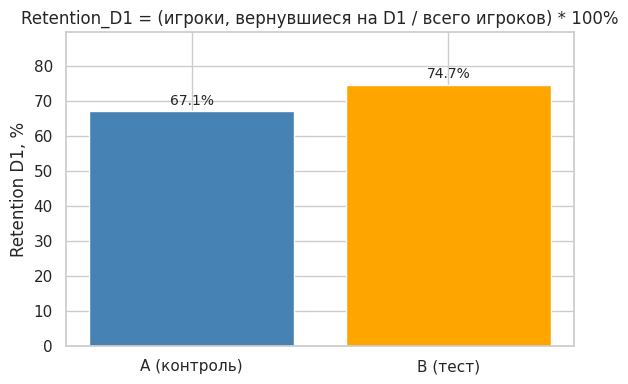

In [ ]:
# Визуализация

import pandas as pd
import matplotlib.pyplot as plt

# 1. Загрузка данных
df = pd.read_csv('/content/drive/MyDrive/Зерокодер/data_raw_game_rv.csv')
df['dt'] = pd.to_datetime(df['dt'])

# 2. Функция для флага D1 retention на уровне игрока
def get_retention_d1_flag(player_df: pd.DataFrame) -> int:
    """
    Возвращает 1, если игрок был активен на следующий календарный день
    после первого появления в логах, иначе 0.
    """
    days = player_df['dt'].dt.date.unique()
    if len(days) < 2:
        return 0
    days_sorted = sorted(days)
    first_day = days_sorted[0]
    # Был ли день, который ровно на 1 день позже первого
    return int(any((d - first_day).days == 1 for d in days_sorted[1:]))

# 3. Расчёт retention-флага для каждого игрока
player_flags = []
for pid, pdf in df.groupby('player_id'):
    flag = get_retention_d1_flag(pdf)
    group = pdf['ab_group'].iloc[0]
    player_flags.append({'player_id': pid, 'ab_group': group, 'retention_d1': flag})

ret_df = pd.DataFrame(player_flags)

# 4. Подсчёт Retention_D1 по группам
agg = (
    ret_df
    .groupby('ab_group')['retention_d1']
    .agg(['sum', 'count'])   # sum = сколько вернулись, count = всего
    .reset_index()
)
agg['Retention_D1'] = agg['sum'] / agg['count'] * 100

# Читаемые подписи групп
group_map = {'A_control': 'A (контроль)', 'B_test': 'B (тест)'}
agg['group_label'] = agg['ab_group'].map(group_map)

print(agg[['group_label', 'sum', 'count', 'Retention_D1']])

# 5. Визуализация Retention_D1 по группам
plt.figure(figsize=(6, 4))
bars = plt.bar(
    agg['group_label'],
    agg['Retention_D1'],
    color=['steelblue', 'orange']
)

# Подписи над столбцами (в процентах)
for bar, val in zip(bars, agg['Retention_D1']):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,
        f'{val:.1f}%',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.title('Retention_D1 = (игроки, вернувшиеся на D1 / всего игроков) * 100%')
plt.ylabel('Retention D1, %')
plt.ylim(0, max(agg['Retention_D1']) * 1.2)
plt.tight_layout()

# 6. Сохранение графика для отчета (опционально)
plt.savefig('retention_d1_by_group.png', dpi=300)
plt.show()


## ШАГ 4: СТАТИСТИЧЕСКАЯ ПРОВЕРКА ЗНАЧИМОСТИ

In [ ]:
# 4.1 Z-TEST для пропорций (для конверсионных метрик)

def z_test_proportions(successes_a, trials_a, successes_b, trials_b):
    """
    Z-тест для сравнения двух пропорций
    H0: p_a = p_b (пропорции равны)
    H1: p_a ≠ p_b (пропорции различаются)
    """
    p_a = successes_a / trials_a
    p_b = successes_b / trials_b

    # Объединенная пропорция (pooled proportion)
    p_pooled = (successes_a + successes_b) / (trials_a + trials_b)

    # Стандартная ошибка разницы пропорций
    se = np.sqrt(p_pooled * (1 - p_pooled) * (1/trials_a + 1/trials_b))

    # Z-статистика
    z_stat = (p_b - p_a) / se if se > 0 else 0

    # P-value (двусторонний тест)
    p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))

    return z_stat, p_value

# Тест для CR_view
z_cr_view, p_cr_view = z_test_proportions(rv_starts_a, rv_offers_a, rv_starts_b, rv_offers_b)

# Тест для CR_complete
z_cr_complete, p_cr_complete = z_test_proportions(rv_completes_a, rv_starts_a, rv_completes_b, rv_starts_b)

# Тест для Retention
z_retention, p_retention = z_test_proportions(retained_a, total_a, retained_b, total_b)

print(f"\n4. СТАТИСТИЧЕСКАЯ ЗНАЧИМОСТЬ:")
print(f"   CR_view: p-value = {p_cr_view:.4f} {'✓ значимо' if p_cr_view < 0.05 else '✗ не значимо'}")
print(f"   CR_complete: p-value = {p_cr_complete:.4f} {'✓ значимо' if p_cr_complete < 0.05 else '✗ не значимо'}")
print(f"   Retention D1: p-value = {p_retention:.4f} {'✓ значимо' if p_retention < 0.05 else '✗ не значимо'}")


4. СТАТИСТИЧЕСКАЯ ЗНАЧИМОСТЬ:
   CR_view: p-value = 0.1260 ✗ не значимо
   CR_complete: p-value = 0.0059 ✓ значимо
   Retention D1: p-value = 0.2917 ✗ не значимо


In [ ]:
# 4.2 T-TEST для ARPU
# Подготовка данных ARPU на уровне игрока

revenue_by_player_a = group_a[group_a['event_type'] == 'revenue'].groupby('player_id')['value'].sum()
all_players_a = group_a['player_id'].unique()
arpu_list_a = [revenue_by_player_a.get(p, 0) for p in all_players_a]

revenue_by_player_b = group_b[group_b['event_type'] == 'revenue'].groupby('player_id')['value'].sum()
all_players_b = group_b['player_id'].unique()
arpu_list_b = [revenue_by_player_b.get(p, 0) for p in all_players_b]

# Независимый t-тест для двух выборок
t_arpu, p_arpu = stats.ttest_ind(arpu_list_a, arpu_list_b)

print(f"   ARPU: p-value = {p_arpu:.4f} {'✓ значимо' if p_arpu < 0.05 else '✗ не значимо'}")

   ARPU: p-value = 0.0000 ✓ значимо


## ШАГ 5: ИТОГОВАЯ ТАБЛИЦА И ВЫВОДЫ

In [ ]:
results = pd.DataFrame([
    {
        'Метрика': 'CR_view (%)',
        'Группа A': f'{cr_view_a:.2f}',
        'Группа B': f'{cr_view_b:.2f}',
        'Прирост (%)': f'{((cr_view_b - cr_view_a) / cr_view_a * 100):.2f}',
        'P-value': f'{p_cr_view:.4f}',
        'Значимость': 'Да' if p_cr_view < 0.05 else 'Нет'
    },
    {
        'Метрика': 'CR_complete (%)',
        'Группа A': f'{cr_complete_a:.2f}',
        'Группа B': f'{cr_complete_b:.2f}',
        'Прирост (%)': f'{((cr_complete_b - cr_complete_a) / cr_complete_a * 100):.2f}',
        'P-value': f'{p_cr_complete:.4f}',
        'Значимость': 'Да' if p_cr_complete < 0.05 else 'Нет'
    },
    {
        'Метрика': 'ARPU ($)',
        'Группа A': f'{arpu_a:.4f}',
        'Группа B': f'{arpu_b:.4f}',
        'Прирост (%)': f'{((arpu_b - arpu_a) / arpu_a * 100):.2f}',
        'P-value': f'{p_arpu:.4f}',
        'Значимость': 'Да' if p_arpu < 0.05 else 'Нет'
    },
    {
        'Метрика': 'Retention D1 (%)',
        'Группа A': f'{retention_a:.2f}',
        'Группа B': f'{retention_b:.2f}',
        'Прирост (%)': f'{((retention_b - retention_a) / retention_a * 100):.2f}',
        'P-value': f'{p_retention:.4f}',
        'Значимость': 'Да' if p_retention < 0.05 else 'Нет'
    }
])

print("\n" + "="*80)
print("ИТОГОВЫЕ РЕЗУЛЬТАТЫ A/B-ТЕСТА")
print("="*80)
print(results.to_string(index=False))

# Сохранение результатов
results.to_csv('ab_test_final_results.csv', index=False, encoding='utf-8-sig')
print("\n✓ Результаты сохранены в файл: ab_test_final_results.csv")


ИТОГОВЫЕ РЕЗУЛЬТАТЫ A/B-ТЕСТА
         Метрика Группа A Группа B Прирост (%) P-value Значимость
     CR_view (%)    27.74    35.71       28.76  0.1260        Нет
 CR_complete (%)    78.95    95.71       21.24  0.0059         Да
        ARPU ($)   0.0104   0.0282      170.45  0.0000         Да
Retention D1 (%)    67.06    74.67       11.35  0.2917        Нет

✓ Результаты сохранены в файл: ab_test_final_results.csv


# Средние значения и дисперсии метрик

In [ ]:
import pandas as pd
import numpy as np
from math import ceil
from scipy import stats

df = pd.read_csv('/content/drive/MyDrive/Зерокодер/data_raw_game_rv.csv')
df['dt'] = pd.to_datetime(df['dt'])

from datetime import timedelta

def get_retention_flag(player_df: pd.DataFrame) -> int:
    days = player_df['dt'].dt.date.unique()
    if len(days) < 2:
        return 0
    days_sorted = sorted(days)
    first_day = days_sorted[0]
    return int(any((d - first_day).days == 1 for d in days_sorted[1:]))

# Метрики на уровне игрока
player_metrics = []
for pid, pdf in df.groupby('player_id'):
    offers = (pdf['event_type'] == 'rv_offer_shown').sum()
    starts = (pdf['event_type'] == 'rv_start').sum()
    completes = (pdf['event_type'] == 'rv_complete').sum()
    rewards_used = (pdf['event_type'] == 'reward_used').sum()
    revenue = pdf.loc[pdf['event_type'] == 'revenue', 'value'].sum()

    cr_view = starts / offers if offers > 0 else np.nan
    cr_complete = completes / starts if starts > 0 else np.nan
    reward_usage = rewards_used / completes if completes > 0 else np.nan
    arpu_user = revenue
    retention_d1 = get_retention_flag(pdf)

    player_metrics.append({
        'player_id': pid,
        'ab_group': pdf['ab_group'].iloc[0],
        'cr_view': cr_view,
        'cr_complete': cr_complete,
        'arpu_user': arpu_user,
        'retention_d1': retention_d1
    })

pm = pd.DataFrame(player_metrics)
control = pm[pm['ab_group'] == 'A_control']

baseline_means = control[['cr_view','cr_complete','arpu_user','retention_d1']].mean()
baseline_vars  = control[['cr_view','cr_complete','arpu_user','retention_d1']].var(ddof=1)
n_current = control.shape[0]

alpha = 0.05
beta = 0.2
z_alpha_2 = stats.norm.ppf(1 - alpha/2)
z_beta    = stats.norm.ppf(1 - beta)

# MDE при текущем n
mde_current = {}
for metric in ['cr_view','cr_complete','arpu_user','retention_d1']:
    sigma2 = baseline_vars[metric]
    mde = (z_alpha_2 + z_beta) * np.sqrt(2 * sigma2 / n_current)
    mde_current[metric] = mde

# n при целевом относительном эффекте 2.5%
required_n = {}
rel_effect = 0.025
for metric in ['cr_view','cr_complete','arpu_user','retention_d1']:
    mu = baseline_means[metric]
    sigma2 = baseline_vars[metric]
    delta = mu * rel_effect
    if delta == 0 or np.isnan(delta):
        required_n[metric] = np.nan
    else:
        n = 2 * sigma2 * (z_alpha_2 + z_beta)**2 / (delta**2)
        required_n[metric] = ceil(n)

print("MDE при текущем n:", mde_current)
print("Требуемый n на группу при uplift 2.5%:", required_n)

MDE при текущем n: {'cr_view': np.float64(0.1513970405416037), 'cr_complete': np.float64(0.17204897846412234), 'arpu_user': np.float64(0.00754784421126276), 'retention_d1': np.float64(0.20317801351819376)}
Требуемый n на группу при uplift 2.5%: {'cr_view': 40089, 'cr_complete': 6596, 'arpu_user': 71070, 'retention_d1': 12485}
